In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape

(404351, 6)

In [4]:
df.sample(10)
#This is a Binary Classification Problemdf.

,id,qid1,qid2,question1,question2,is_duplicate
51672,51672,102830,102831,What topics have recognized topic biographies?...,Why do only selected topics have recognized to...,0
63057,63057,125403,125404,Do the hands of a clock ever separate the cloc...,Is there a time when all 3 hands on a clock ar...,1
309383,309383,607348,607349,Is it possible to stop masturbating?,How can I stop the urge to masturbate?,1
135681,135681,268660,268661,What is tier 4 and tier 5 in SSC?,What is tier 1 and tier 2 in the SSC exams?,0
265022,265022,521416,521417,Noam Chomsky: Every neo-eugenics is talking ab...,"I don't know much about it but, if the big ban...",0
311636,311636,611713,611714,How come Brownfield Capital only netted $80m i...,In the movie Big Short why did the guys who pu...,0
73128,73128,145326,145327,How were the placements for FORE School of Man...,I want to take an admission in FORE School of ...,0
86166,86166,171122,171123,How do you train Husky puppies mixed with Germ...,How do you train a German Shepherd/Siberian Hu...,1
241620,241620,475914,475915,What is the best way to stop drinking without ...,How do I quit drinking alcohol without going t...,1
125903,125903,249450,249451,How do I forget someone I was deeply in love?,How do I forget someone I love very deeply and...,1


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [11]:
# Get the class distribution
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count() * 100)

is_duplicate
0    255042
1    149306
Name: count, dtype: int64
is_duplicate
0    63.074876
1    36.925124
Name: count, dtype: float64


In [12]:
#repeated questions
newlen = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print(np.unique(newlen).shape[0])
x = newlen.value_counts() > 1
print(x[x].shape[0])

789795
13698


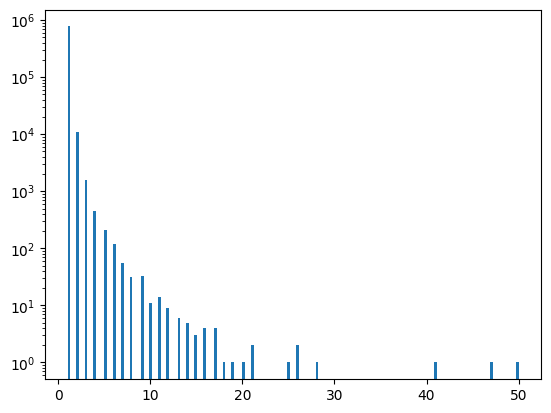

In [14]:
# we plot a histogram of the number of times each question has appeared
plt.hist(newlen.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

### Modified BOW

In [71]:
newdf =  df.sample(50000)

In [72]:
newdf['q1len'] = newdf['question1'].apply(lambda x:len(x))
newdf['q2len'] = newdf['question2'].apply(lambda x:len(x))

In [73]:
def countwords(text):
    count=0
    for word in text.split(' '):
        count+=1
    return count

newdf['q1words'] = newdf['question1'].apply(countwords)
newdf['q2words'] = newdf['question2'].apply(countwords)

In [74]:
def common_words(row):
    # Splitting each question into words and converting to lowercase
    words1 = set(map(lambda x: x.lower(), row['question1'].split()))
    words2 = set(map(lambda x: x.lower(), row['question2'].split()))
    # Finding the common words
    common_words_set = words1.intersection(words2)
    return len(common_words_set)
newdf['common_words'] = newdf.apply(common_words, axis=1)
# Displaying the DataFrame with the new column
newdf

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,common_words
210874,210874,415937,415938,How do you start your own internet service pro...,How can I start an Internet provider service? ...,1,52,85,9,17,4
23203,23203,46293,46294,Why are people who are half-black and half-whi...,What do black people dislike most about the wh...,0,89,97,14,16,1
167836,167836,331698,331699,I've had a drastic change from being an extrov...,If one’s first heartbreak is experienced as an...,0,299,142,61,24,8
399585,399585,780669,780670,Which mobile phone should I buy under Rs.15000?,Which mobile is better under 15k?,1,47,33,8,6,3
11777,11777,23514,23515,How does the ban on 500 and 1000 rupee notes h...,How can scrapping use of 500 and 1000 rupee cu...,1,90,96,17,17,7
...,...,...,...,...,...,...,...,...,...,...,...
134154,134154,265669,265670,What is the shortest and longest bones in a hu...,How do bones in the human skull protect our br...,0,59,50,11,10,4
193954,193954,382853,382854,How are gender norms applied?,What are gender norms?,0,29,22,5,4,2
21392,21392,42678,42679,Can I become a multi millionaire on Amazon or ...,Can I become a millionaire heading into 2017 s...,1,66,93,13,17,11
115918,115918,229784,229785,Are we creating the problems unknowingly or cr...,If we truly acknowledged our mortality on a da...,0,144,388,26,73,12


In [75]:
def total_words(row):
    w1 = set(map(lambda x: x.lower(), row['question1'].split()))
    w2 = set(map(lambda x: x.lower(), row['question2'].split()))
    return len(w1) + len(w2)
newdf['total_words'] = newdf.apply(total_words, axis=1)
# Displaying the DataFrame with the new column
newdf

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,common_words,total_words
210874,210874,415937,415938,How do you start your own internet service pro...,How can I start an Internet provider service? ...,1,52,85,9,17,4,24
23203,23203,46293,46294,Why are people who are half-black and half-whi...,What do black people dislike most about the wh...,0,89,97,14,16,1,28
167836,167836,331698,331699,I've had a drastic change from being an extrov...,If one’s first heartbreak is experienced as an...,0,299,142,61,24,8,69
399585,399585,780669,780670,Which mobile phone should I buy under Rs.15000?,Which mobile is better under 15k?,1,47,33,8,6,3,14
11777,11777,23514,23515,How does the ban on 500 and 1000 rupee notes h...,How can scrapping use of 500 and 1000 rupee cu...,1,90,96,17,17,7,32
...,...,...,...,...,...,...,...,...,...,...,...,...
134154,134154,265669,265670,What is the shortest and longest bones in a hu...,How do bones in the human skull protect our br...,0,59,50,11,10,4,21
193954,193954,382853,382854,How are gender norms applied?,What are gender norms?,0,29,22,5,4,2,9
21392,21392,42678,42679,Can I become a multi millionaire on Amazon or ...,Can I become a millionaire heading into 2017 s...,1,66,93,13,17,11,30
115918,115918,229784,229785,Are we creating the problems unknowingly or cr...,If we truly acknowledged our mortality on a da...,0,144,388,26,73,12,82


In [76]:
newdf['wordshare'] = round(newdf['common_words'] / newdf['total_words'],2)
newdf

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1words,q2words,common_words,total_words,wordshare
210874,210874,415937,415938,How do you start your own internet service pro...,How can I start an Internet provider service? ...,1,52,85,9,17,4,24,0.17
23203,23203,46293,46294,Why are people who are half-black and half-whi...,What do black people dislike most about the wh...,0,89,97,14,16,1,28,0.04
167836,167836,331698,331699,I've had a drastic change from being an extrov...,If one’s first heartbreak is experienced as an...,0,299,142,61,24,8,69,0.12
399585,399585,780669,780670,Which mobile phone should I buy under Rs.15000?,Which mobile is better under 15k?,1,47,33,8,6,3,14,0.21
11777,11777,23514,23515,How does the ban on 500 and 1000 rupee notes h...,How can scrapping use of 500 and 1000 rupee cu...,1,90,96,17,17,7,32,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134154,134154,265669,265670,What is the shortest and longest bones in a hu...,How do bones in the human skull protect our br...,0,59,50,11,10,4,21,0.19
193954,193954,382853,382854,How are gender norms applied?,What are gender norms?,0,29,22,5,4,2,9,0.22
21392,21392,42678,42679,Can I become a multi millionaire on Amazon or ...,Can I become a millionaire heading into 2017 s...,1,66,93,13,17,11,30,0.37
115918,115918,229784,229785,Are we creating the problems unknowingly or cr...,If we truly acknowledged our mortality on a da...,0,144,388,26,73,12,82,0.15


### Basic EDA on Word Counts

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


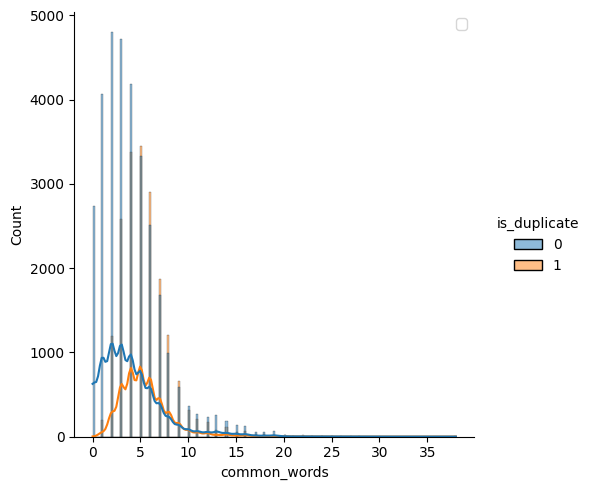

In [87]:
sns.displot(newdf, x='common_words', hue='is_duplicate', kde=True, common_norm=False)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


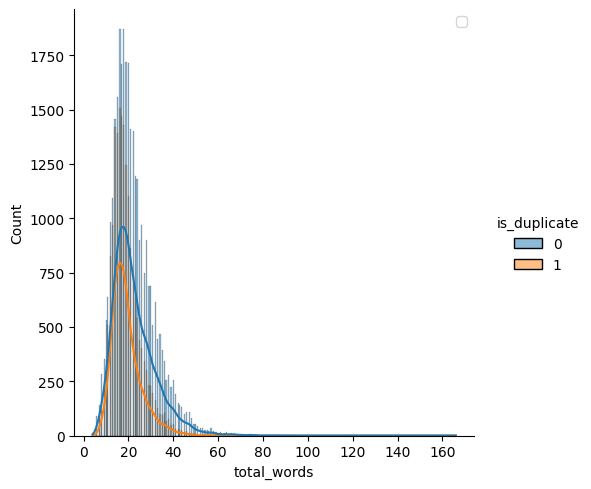

In [88]:
sns.displot(newdf, x='total_words', hue='is_duplicate', kde=True, common_norm=False)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


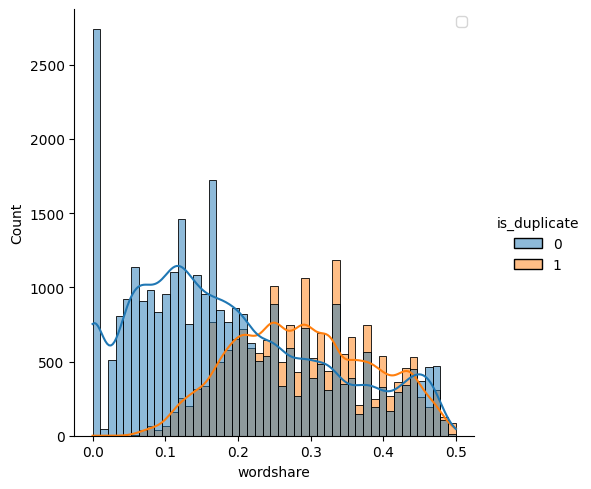

In [89]:
sns.displot(newdf, x='wordshare', hue='is_duplicate', kde=True, common_norm=False)
plt.legend()
plt.show()

### Random Forext Classifier

In [90]:
quesdf = newdf[['question1','question2']]

In [91]:
final_df = newdf.drop(columns=['id','qid1','qid2','question1','question2'])

In [97]:
final_df

,is_duplicate,q1len,q2len,q1words,q2words,common_words,total_words,wordshare
210874,1,52,85,9,17,4,24,0.17
23203,0,89,97,14,16,1,28,0.04
167836,0,299,142,61,24,8,69,0.12
399585,1,47,33,8,6,3,14,0.21
11777,1,90,96,17,17,7,32,0.22
...,...,...,...,...,...,...,...,...
134154,0,59,50,11,10,4,21,0.19
193954,0,29,22,5,4,2,9,0.22
21392,1,66,93,13,17,11,30,0.37
115918,0,144,388,26,73,12,82,0.15


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(quesdf['question1'].fillna('')) + list(quesdf['question2'].fillna(''))

# Call the CountVectorizer object
cv = CountVectorizer(max_features=3000)
q1, q2 = np.vsplit(cv.fit_transform(questions).toarray(), 2)


In [94]:
tdf1 = pd.DataFrame(q1, index = newdf.index)
tdf2 = pd.DataFrame(q2, index = newdf.index)

In [95]:
bowdf = pd.concat([tdf1,tdf2],axis=1)

In [102]:
findf = pd.concat([final_df,bowdf],axis=1)

In [108]:
X = findf.iloc[:,1:]
y = findf.iloc[:,0]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=None)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7837